In [1]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
from scipy import stats


In [2]:
data = pd.read_excel('正式数据EHG.xlsx')

data = pd.read_excel('正式数据EHG.xlsx')


categ = data['number']

Y_label = data.loc[:,'>24hours']


RMS_t  = data.loc[categ ==2, 'RMS']   # 临产组的RMS值
RMS_p  = data.loc[categ ==1, 'RMS']   # 孕组的RMS值


Freq_t  = data.loc[categ ==2, 'Frequency']   # 临产组的Frequency值
Freq_p  = data.loc[categ ==1, 'Frequency']   # 孕组的Frequency值


Duration_t  = data.loc[categ ==2, 'Duration']   # 临产组的Duration值
Duration_p  = data.loc[categ ==1, 'Duration']   # 孕组的Duration值



SamEn_t  = data.loc[categ ==2, 'SamEn']   # 临产组的SamEn值
SamEn_p  = data.loc[categ ==1, 'SamEn']   # 孕组的SamEn值




Corret_t  = data.loc[categ ==2, 'Coherence']   # 临产组的ψ值
Corret_p  = data.loc[categ ==1, 'Coherence']   # 孕组的ψ值


wks_t  = data.loc[categ ==2, 'wks']   # 临产组的ψ值
wks_p  = data.loc[categ ==1, 'wks']   # 孕组的ψ值 



term_group = {'RMS': RMS_t,'Freq':Freq_t,'Duration':Duration_t, 'SamEn':SamEn_t,'Corret':Corret_t,'wks':wks_t}
preg_group = {'RMS': RMS_p,'Freq':Freq_p,'Duration':Duration_p, 'SamEn':SamEn_p,'Corret':Corret_p,'wks':wks_p}

term_group = pd.DataFrame(term_group)
preg_group = pd.DataFrame(preg_group)


Label = ['RMS', 'Freq','Durat','SamEn',' ψ ','wks']










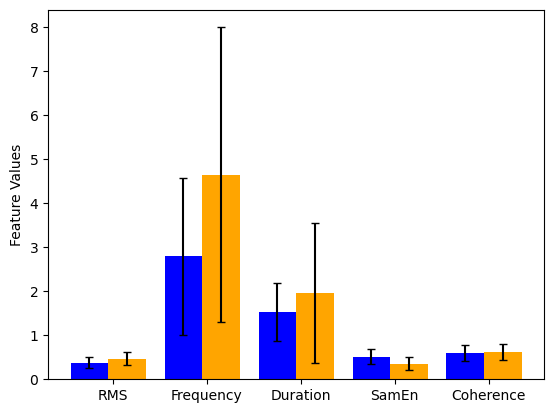

In [3]:

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt


excel_file = '正式数据EHG.xlsx' 
df = pd.read_excel(excel_file)
features_columns = [ 'RMS','Frequency','Duration','SamEn', 'Coherence']  
label_column = '>24hours' 

for i, feature_column in enumerate(features_columns):
    feature_data = [df[df[label_column] == label_value][feature_column] for label_value in df[label_column].unique()]
    mean_values = [data.mean() for data in feature_data]
    std_values = [data.std() for data in feature_data]
    # yerr就是误差条
    plt.bar(i * 2, mean_values[0], yerr=std_values[0], width=0.8, color='blue', label=f'Label 0 - {feature_column}', capsize=3)
    plt.bar(i * 2 + 0.8, mean_values[1], yerr=std_values[1], width=0.8, color='orange', label=f'Label 1 - {feature_column}', capsize=3)

plt.ylabel('Feature Values')
plt.xticks(np.arange(len(features_columns)) * 2 + 0.5, features_columns)

# 显示图形
plt.show()


We perform One-Way ANOVA in the following

In [5]:

F, p = f_oneway(term_group,preg_group)

print(' One-way  ANOVA Result\n')
print('Label\t','F-Value\t',' p-value')
print
for i in range(len(Label)):
    print('%s\t   %.3f \t %e' %(Label[i],F[i], p[i]))
    print


print(np.mean(wks_p), np.std(wks_p))
print(np.mean(wks_t), np.std(wks_t))


 One-way  ANOVA Result

Label	 F-Value	  p-value
RMS	   13.105 	 4.393721e-04
Freq	   15.086 	 1.720000e-04
Durat	   4.054 	 4.640278e-02
SamEn	   27.523 	 7.164242e-07
 ψ 	   0.335 	 5.637370e-01
wks	   76.086 	 2.424772e-14
269.49295774647885 5.757721672447319
278.3478260869565 4.555061166507405


We perform T-test to check the ability of each feature

In [6]:

print('T -test on Features\n')
print('Label\t','T-Statics\t',' p-value')
tmp = stats.ttest_ind(RMS_t, RMS_p)
print('%s\t %.3f \t %e' %('RMS',tmp[0],tmp[1]))

tmp = stats.ttest_ind(Freq_t, Freq_p)
print('%s\t %.3f \t %e' %('Freq',tmp[0],tmp[1]))


tmp = stats.ttest_ind(Duration_t, Duration_p)
print('%s\t %.3f \t %e' %('Durat',tmp[0],tmp[1]))

tmp = stats.ttest_ind(SamEn_t, SamEn_p)
print('%s\t %.3f \t\t%e' %('SamEn',tmp[0],tmp[1]))


tmp = stats.ttest_ind(Corret_t, Corret_p)
print('%s\t %.3f \t %e\n' %(' ψ ',tmp[0],tmp[1]))


T -test on Features

Label	 T-Statics	  p-value
RMS	 3.620 	 4.393721e-04
Freq	 3.884 	 1.720000e-04
Durat	 2.013 	 4.640278e-02
SamEn	 -5.246 		7.164242e-07
 ψ 	 0.579 	 5.637370e-01



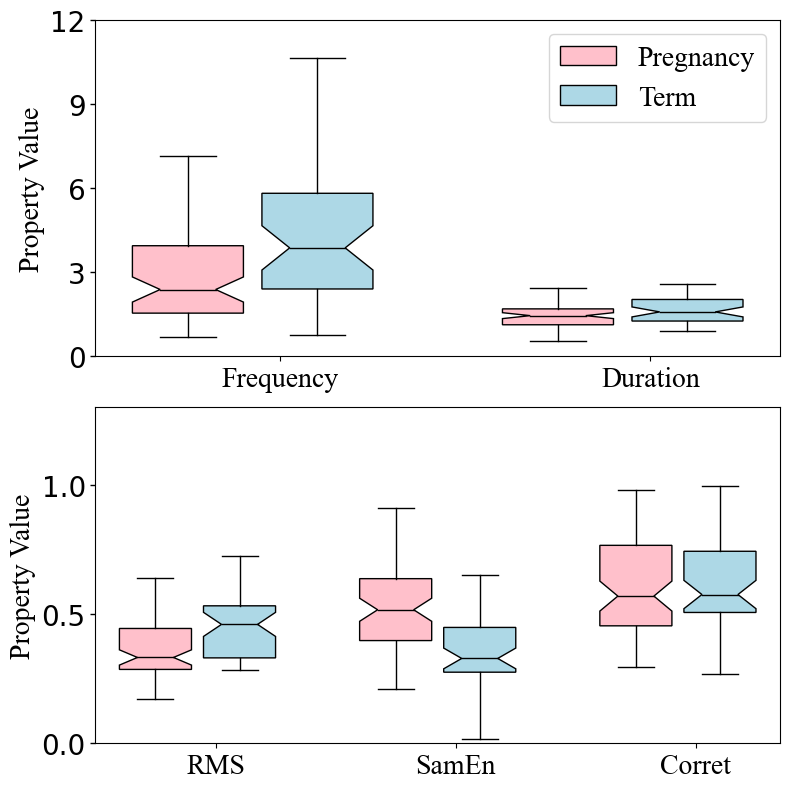

In [7]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def plt_bar():
    excel_file = 'EHG_data.xlsx' 
    df = pd.read_excel(excel_file)
    features_columns = [ 'RMS','Frequency','Duration', 'SamEn', 'Corret']  
    label_column = '<20hours' 
    legend_label_1 = ['Pregnancy','Term']
    legend_size = 12

    fig, ax = plt.subplots(1,1,figsize = (6.5,4),constrained_layout=True)

    for i, feature_column in enumerate(features_columns):
        feature_data = [df[df[label_column] == label_value][feature_column] for label_value in df[label_column].unique()]
        mean_values = [data.mean() for data in feature_data]
        std_values = [data.std() for data in feature_data]
        # yerr就是误差条
        plt.bar(i * 2, mean_values[0], yerr=std_values[0], width=0.8, color='skyblue', label=f'Label 0 - {feature_column}', capsize=5)
        plt.bar(i * 2 + 0.8, mean_values[1], yerr=std_values[1], width=0.8, color='orange', label=f'Label 1 - {feature_column}', capsize=5)

    p1=plt.legend(legend_label_1,loc='upper right',prop = {'family' : 'Times New Roman','size':legend_size})
    plt.gca().add_artist(p1)
    # plt.ylabel('Features')
    plt.xticks(np.arange(len(features_columns)) * 2 + 0.5, features_columns,fontproperties='Times New Roman',size=12)
    plt.savefig('output.pdf')
    plt.show()


def plt_box():
    excel_file = 'EHG_data.xlsx'  
    df = pd.read_excel(excel_file)

    features_columns_1 = [ 'Frequency','Duration','RMS', 'SamEn', 'Corret'] 
    label_column = '<24hours' 
    legend_label_1 = ['Pregnancy','Term']
    figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
    features_columns_2 = features_columns_1[:2]
    for i, feature_column in enumerate(features_columns_2):
        feature_data = [df[df[label_column] == label_value][feature_column] for label_value in df[label_column].unique()]
        positions = [i * 2, i * 2 + 0.7]

        box1 = axes[0].boxplot(feature_data, positions=positions, widths=0.6, medianprops={'color': 'k', 'linewidth': 1},
                            patch_artist=True, notch=True,showfliers=False)
        colors = ['pink', 'lightblue']
        for patch, color in zip(box1['boxes'], colors):
            patch.set_facecolor(color)
        axes[0].legend(box1['boxes'], legend_label_1, prop={'family': 'Times New Roman', 'size': 20}, loc='upper right')
        axes[0].set_ylim([0,12])
        axes[0].set_yticks(np.arange(5) * 3)
        axes[0].set_xticks(np.arange(len(features_columns_2)) * 2 + 0.5)
        axes[0].set_xticklabels(features_columns_2,fontdict={'family' : 'Times New Roman', 'size'   :20})
        axes[0].set_ylabel('Property Value', fontdict={'family': 'Times New Roman', 'size': 20})


    features_columns_3 = features_columns_1[2:]
    for i, feature_column in enumerate(features_columns_3):
        feature_data = [df[df[label_column] == label_value][feature_column] for label_value in df[label_column].unique()]
        positions = [i * 2, i * 2 + 0.7]
        box2 = axes[1].boxplot(feature_data, positions=positions, widths=0.6, medianprops={'color': 'k', 'linewidth': 1},
                            patch_artist=True, notch=True,showfliers=False)
        colors = ['pink', 'lightblue']
        for patch, color in zip(box2['boxes'], colors):
            patch.set_facecolor(color)
        # axes[1].legend(box1['boxes'], legend_label_1, prop={'family': 'Times New Roman', 'size': 12})
        axes[1].set_ylim([0,1.3])
        axes[1].set_yticks(np.arange(3) * 0.5)
        
        axes[1].set_xticks(np.arange(len(features_columns_3)) * 2 + 0.5)
        axes[1].set_xticklabels(features_columns_3,fontdict={'family' : 'Times New Roman', 'size'   :20})
        axes[1].set_ylabel('Property Value', fontdict={'family': 'Times New Roman', 'size': 20})

    axes[0].tick_params(axis='y', labelsize=20, labelrotation=0, labelcolor='black', width=1)
    axes[1].tick_params(axis='y', labelsize=20, labelrotation=0, labelcolor='black', width=1)

    i =0
    for ax in axes:
        # ax.set_xlabel('Property Value', fontdict={'family': 'Times New Roman', 'size': 20})
        ax.grid(False)
        # ax.set_ylim([-0.1, 11])
    plt.tight_layout()
    plt.savefig('output2.pdf')
    plt.show()

plt_box()

In [8]:
def Feature_ROC(feature_p, feature_f):
    ''' 
    Positive group is assumed to be of smaller features 
    '''
    n1 = len(feature_p)
    n2 = len(feature_f)
    min_feature = min(min(feature_p), min(feature_f))
    max_feature = max(max(feature_p), max(feature_f))
    step = (max_feature-min_feature)/20
    CuttOff = np.zeros(len(feature_p))
    
    specificity = [0]*22
    sensitivity = [0]*22
    for i in range(22):
        threshold = -step+min_feature + i*step
        CuttOff[i] = threshold
        TP = sum(feature_p<=threshold)
        FN = sum(feature_p>=threshold)
        TN = sum(feature_f>=threshold)
        FP = sum(feature_f<=threshold)

        CuttOff[i]= threshold
        specificity[i] = TN/(TN +FP)
        sensitivity [i]= TP/(TP+FN)
    
    tmp_y = [0.5*(sensitivity[i]+sensitivity[i+1]) for i in range(len(sensitivity)-1) ]
    tmp   = 1-np.array(specificity)
    tmp   = list(tmp)
    
    tmp_x = [(tmp[i+1]-tmp[i]) for i in range(len(tmp)-1)]
    AUC   = sum([ (tmp_y[i]*tmp_x[i] ) for i in range (len (tmp_y) )])
    
 
    
        
    return np.array(sensitivity), np.array(specificity),CuttOff, AUC
    
    

In [9]:
def Yoden_index(feature_p, feature_f):
    ''' 
    Positive group is assumed to be of smaller features 
    '''
    
    sens, spec, threshold,tmp= Feature_ROC(feature_p, feature_f)
    tmp = sens+spec -1.0
    ind = np.argmax(tmp)
    Yindex= np.max(tmp)
    cutvalue = threshold[ind]
    return Yindex, cutvalue
    
   

AUC values 
RMS: 0.693, SamEn: 0.744, Frquency: 0.692, Duration: 0.607,  ψ : 0.539


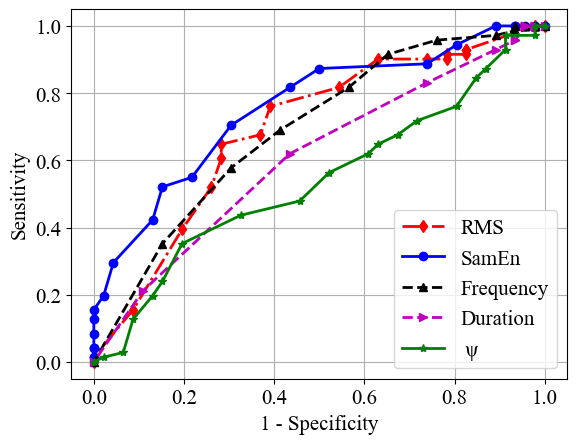

In [10]:
fig, ax = plt.subplots(1)

spec, sens,cut, AUC_rms = Feature_ROC(-RMS_t,-RMS_p)
ax.plot(1-np.array(spec), sens,'r-.d', lw=2,label='RMS')

spec, sens,cut,AUC_SamEN = Feature_ROC(SamEn_t,SamEn_p)
ax.plot(1-np.array(spec), sens,'b-o',  lw=2,label='SamEn')

spec, sens,cut, AUC_Freq= Feature_ROC(-Freq_t,-Freq_p)
ax.plot(1-np.array(spec), sens,'k--^', lw=2, label='Frequency')



spec, sens, cut,AUC_Duration = Feature_ROC(-Duration_t,-Duration_p)
ax.plot(1-np.array(spec), sens,'m-->',  lw=2,label='Duration')

spec, sens,cut,AUC_Phi = Feature_ROC(-Corret_t,-Corret_p)
ax.plot(1-np.array(spec), sens,'g-*', lw=2, label=' ψ ')

ax.legend( prop={'family': 'Times New Roman', 'size': 15})
plt.xticks(np.arange(6) * 0.2, fontproperties='Times New Roman',size=15)
plt.yticks(np.arange(6) * 0.2, fontproperties='Times New Roman',size=15)
ax.set_xlabel('1 - Specificity',fontdict={'family': 'Times New Roman', 'size': 15})
ax.set_ylabel('Sensitivity',fontdict={'family': 'Times New Roman', 'size': 15})










print('AUC values ')
print('RMS: %.3f, SamEn: %.3f, Frquency: %.3f, Duration: %.3f,  ψ : %.3f' %(AUC_rms,AUC_SamEN,AUC_Freq, AUC_Duration,AUC_Phi  ))
ax.grid()

In [11]:
YonIndex, threshold = Yoden_index(SamEn_t,SamEn_p)
A = sum(SamEn_t <= threshold) 
B =  sum(SamEn_p <= threshold)


print('\t\t\t Term \t\t Pregnancy')
print("SamEn <=threshold \t {} \t\t {}".format(A, B))


C = sum(SamEn_t > threshold)
D = sum(SamEn_p >  threshold)





print("SamEn > threshold  \t {} \t\t {}".format(C, D))

SE = np.sqrt(1./A +1./C -1./(A+B) - 1./(C+D))
RR = ( A/(A+B))/( C/(C+D) )
print('Relative Risk:\t\t %2.1f(%2.1f-%2.1f)' %( RR, np.exp(np.log(RR)-1.96*SE ),  np.exp(np.log(RR)+1.96*SE )    ))
 




			 Term 		 Pregnancy
SamEn <=threshold 	 32 		 21
SamEn > threshold  	 14 		 50
Relative Risk:		 2.8(1.7-4.6)


In [12]:
YonIndex, threshold = Yoden_index(-RMS_t,-RMS_p)
threshold = -1.0 *threshold
A = sum(RMS_t >= threshold) 
B =  sum(RMS_p >=threshold)


print('\t\t\t Term \t\t Pregnancy')
print("RMS >=threshold \t {} \t\t {}".format(A, B))


C = sum(RMS_t <  threshold)
D = sum(RMS_p <  threshold)

print("RMS < threshold  \t {} \t\t {}".format(C, D))

SE = np.sqrt(1./A +1./C -1./(A+B) - 1./(C+D))
RR = ( A/(A+B))/( C/(C+D) )
print('Relative Risk:\t\t %2.1f(%2.1f-%2.1f)' %( RR, np.exp(np.log(RR)-1.96*SE ),  np.exp(np.log(RR)+1.96*SE )    ))
 




			 Term 		 Pregnancy
RMS >=threshold 	 28 		 17
RMS < threshold  	 18 		 54
Relative Risk:		 2.5(1.6-3.9)


In [13]:
YonIndex, threshold = Yoden_index(-Freq_t,-Freq_p)
threshold = -1.0 *threshold
A = sum(Freq_t >= threshold) 
B =  sum(Freq_p >=threshold)


print('\t\t\t Term \t\t Pregnancy')
print("Freq >=threshold \t {} \t\t {}".format(A, B))


C = sum(Freq_t <  threshold)
D = sum(Freq_p <  threshold)

print("Freq < threshold  \t {} \t\t {}".format(C, D))

SE = np.sqrt(1./A +1./C -1./(A+B) - 1./(C+D))
RR = ( A/(A+B))/( C/(C+D) )
print('Relative Risk:\t\t %2.1f(%2.1f-%2.1f)' %( RR, np.exp(np.log(RR)-1.96*SE ),  np.exp(np.log(RR)+1.96*SE )    ))
 



			 Term 		 Pregnancy
Freq >=threshold 	 27 		 22
Freq < threshold  	 19 		 49
Relative Risk:		 2.0(1.2-3.1)


In [14]:
YonIndex, threshold = Yoden_index(-Duration_t,-Duration_p)
threshold = -1.0 *threshold
A = sum(Duration_t >= threshold) 
B =  sum(Duration_p >=threshold)


print('\t\t\t Term \t\t Pregnancy')
print("Duration >=threshold \t {} \t\t {}".format(A, B))


C = sum(Duration_t <  threshold)
D = sum(Duration_p <  threshold)

print("Duration < threshold  \t {} \t\t {}".format(C, D))
SE = np.sqrt(1./A +1./C -1./(A+B) - 1./(C+D))
RR = ( A/(A+B))/( C/(C+D) )
print('Relative Risk:\t\t %2.1f(%2.1f-%2.1f)' %( RR, np.exp(np.log(RR)-1.96*SE ),  np.exp(np.log(RR)+1.96*SE )    ))
 



			 Term 		 Pregnancy
Duration >=threshold 	 26 		 27
Duration < threshold  	 20 		 44
Relative Risk:		 1.6(1.0-2.5)


In [15]:
YonIndex, threshold = Yoden_index(-Corret_t,-Corret_p)
threshold = -1.0 *threshold
A = sum(Corret_t >= threshold) 
B =  sum(Corret_p >=threshold)


print('\t\t\t Term \t\t Pregnancy')
print("ψ  >=threshold\t \t {} \t\t {}".format(A, B))


C = sum(Corret_t <  threshold)
D = sum(Corret_p <  threshold)

print("ψ  < threshold  \t {} \t\t {}".format(C, D))

SE = np.sqrt(1./A +1./C -1./(A+B) - 1./(C+D))
RR = ( A/(A+B))/( C/(C+D) )
print('Relative Risk:\t\t %2.1f(%2.1f-%2.1f)' %( RR, np.exp(np.log(RR)-1.96*SE ),  np.exp(np.log(RR)+1.96*SE )    ))
 



			 Term 		 Pregnancy
ψ  >=threshold	 	 37 		 46
ψ  < threshold  	 9 		 25
Relative Risk:		 1.7(0.9-3.1)


# 多因素logitic回归分析

In [16]:
import statsmodels.api as sm
import pandas as pd



data = pd.read_excel('正式数据EHG.xlsx')
X = data[['RMS','Frequency','Duration','SamEn','Coherence']]
y = data['>24hours']
X = sm.add_constant(X)
model = sm.Logit(y,X).fit()

print(model.summary())
print(model.pvalues)


params =  model.params

conf = model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']

print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.467385
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               >24hours   No. Observations:                  117
Model:                          Logit   Df Residuals:                      111
Method:                           MLE   Df Model:                            5
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                  0.3026
Time:                        09:18:49   Log-Likelihood:                -54.684
converged:                       True   LL-Null:                       -78.407
Covariance Type:            nonrobust   LLR p-value:                 4.610e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0952      1.512      1.386      0.166      -0.867       5.058
RMS           -4.7776      1.

In [17]:

X = data[['RMS','Frequency','Duration','SamEn']]
y = data['>24hours']
X = sm.add_constant(X)
model = sm.Logit(y,X).fit()

print(model.summary())
print(model.pvalues)


params =  model.params

conf = model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']

print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.467426
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               >24hours   No. Observations:                  117
Model:                          Logit   Df Residuals:                      112
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                  0.3025
Time:                        09:18:49   Log-Likelihood:                -54.689
converged:                       True   LL-Null:                       -78.407
Covariance Type:            nonrobust   LLR p-value:                 1.237e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0282      1.349      1.503      0.133      -0.616       4.673
RMS           -4.8070      1.

Index(['case', 'number', 'wks', 'RMS', 'Frequency', 'Duration', 'SamEn',
       'Coherence', '>24hours'],
      dtype='object')


<Figure size 640x480 with 0 Axes>

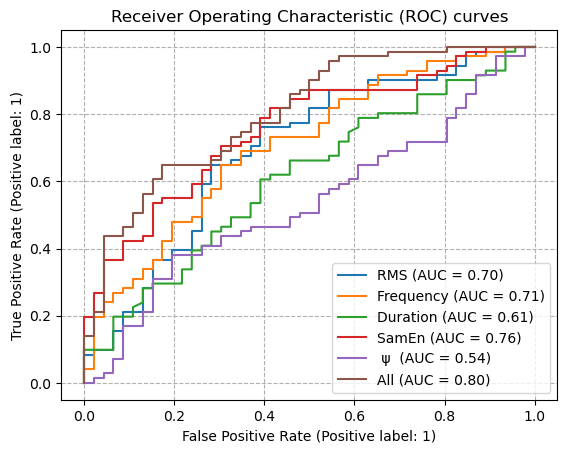

[[-1.48641866 -0.32522858  2.11351001]]


In [18]:
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

from sklearn.model_selection import train_test_split

print(data.columns)
Y_label    = data.loc[:,'>24hours']
#X_features = data.loc[:,['RMS','Frequency','Duration','SamEn','Coherence']]
#X_features = data.loc[:,['RMS','Frequency','Duration','SamEn']]
X_features = data.loc[:,['RMS']]
X,Y = shuffle(X_features, Y_label, random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)


from sklearn.linear_model import LogisticRegression

model = LogisticRegression() #创建模型
model.fit(X_features, Y_label) #训练


fig = plt.figure()


ax_roc =RocCurveDisplay.from_estimator(model, X_features, Y_label,name='RMS' )



##
X_features = data.loc[:,['Frequency']]
X,Y = shuffle(X_features, Y_label, random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)


from sklearn.linear_model import LogisticRegression

model = LogisticRegression() #创建模型
model.fit(X_features, Y_label) #训练


RocCurveDisplay.from_estimator(model, X_features, Y_label,ax=ax_roc.ax_,name='Frequency')





X_features = data.loc[:,['Duration']]
X,Y = shuffle(X_features, Y_label, random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)


from sklearn.linear_model import LogisticRegression

model = LogisticRegression() #创建模型
model.fit(X_features, Y_label) #训练


RocCurveDisplay.from_estimator(model, X_features, Y_label, ax=ax_roc.ax_,name='Duration')


X_features = data.loc[:,['SamEn']]
X,Y = shuffle(X_features, Y_label, random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)


model = LogisticRegression() #创建模型
model.fit(X_features, Y_label) #训练


RocCurveDisplay.from_estimator(model, X_features, Y_label, ax=ax_roc.ax_,name='SamEn')



X_features = data.loc[:,['Coherence']]
X,Y = shuffle(X_features, Y_label, random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)


model = LogisticRegression() #创建模型
model.fit(X_features, Y_label) #训练


RocCurveDisplay.from_estimator(model, X_features, Y_label, ax=ax_roc.ax_,name=' ψ ')




X_features = data.loc[:,['RMS','Frequency','SamEn']]
X,Y = shuffle(X_features, Y_label, random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)


model = LogisticRegression() #创建模型
model.fit(X_features, Y_label) #训练


RocCurveDisplay.from_estimator(model, X_features, Y_label, ax=ax_roc.ax_, name='All')

















ax_roc.ax_.set_title("Receiver Operating Characteristic (ROC) curves")

ax_roc.ax_.grid(linestyle="--")

plt.legend()
plt.show()











print(model.coef_)

AUC values 
RMS: 0.693, SamEn: 0.744, Frquency: 0.692, Duration: 0.607,  ψ : 0.539


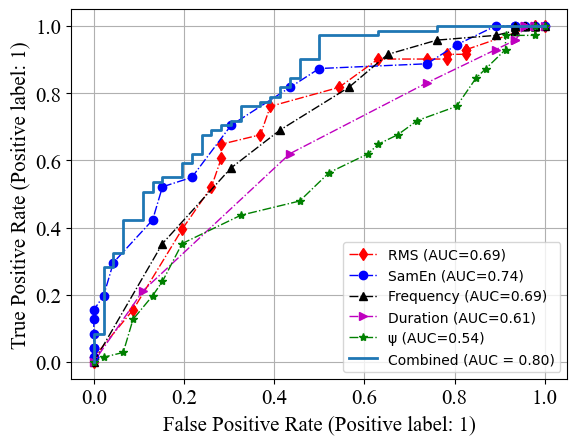

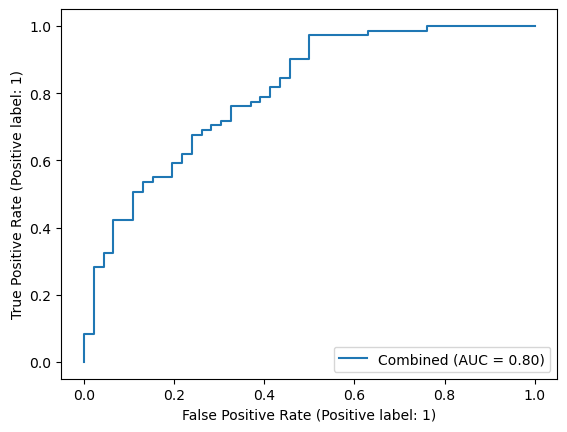

In [20]:






from sklearn.utils import shuffle

import matplotlib.pyplot as plt

from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

from sklearn.model_selection import train_test_split






fig, ax = plt.subplots(1)

spec, sens,cut, AUC_rms = Feature_ROC(-RMS_t,-RMS_p)
ax.plot(1-np.array(spec), sens,'r-.d', lw=1,label='RMS (AUC=0.69)')

spec, sens,cut,AUC_SamEN = Feature_ROC(SamEn_t,SamEn_p)
ax.plot(1-np.array(spec), sens,'b-.o',  lw=1,label='SamEn (AUC=0.74)')

spec, sens,cut, AUC_Freq= Feature_ROC(-Freq_t,-Freq_p)
ax.plot(1-np.array(spec), sens,'k-.^', lw=1, label='Frequency (AUC=0.69)')



spec, sens, cut,AUC_Duration = Feature_ROC(-Duration_t,-Duration_p)
ax.plot(1-np.array(spec), sens,'m-.>',  lw=1,label='Duration (AUC=0.61)')

spec, sens,cut,AUC_Phi = Feature_ROC(-Corret_t,-Corret_p)
ax.plot(1-np.array(spec), sens,'g-.*', lw=1, label='ψ (AUC=0.54)')

ax.legend( prop={'family': 'Times New Roman', 'size': 15})
plt.xticks(np.arange(6) * 0.2, fontproperties='Times New Roman',size=15)
plt.yticks(np.arange(6) * 0.2, fontproperties='Times New Roman',size=15)
ax.set_xlabel('1 - Specificity',fontdict={'family': 'Times New Roman', 'size': 15})
ax.set_ylabel('Sensitivity',fontdict={'family': 'Times New Roman', 'size': 15})








X_features = data.loc[:,['RMS','Frequency','SamEn','Duration','Coherence']]
X,Y = shuffle(X_features, Y_label, random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)


model = LogisticRegression() #创建模型
model.fit(X_features, Y_label) #训练


display=RocCurveDisplay.from_estimator(model, X_features, Y_label, ax=ax, name='Combined',lw=2)







print('AUC values ')
print('RMS: %.3f, SamEn: %.3f, Frquency: %.3f, Duration: %.3f,  ψ : %.3f' %(AUC_rms,AUC_SamEN,AUC_Freq, AUC_Duration,AUC_Phi  ))
ax.grid()





In [91]:
model.score(X_test, Y_test)

0.875

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train,Y_train , cv=5, scoring='roc_auc')

array([0.95238095, 0.94318182, 0.64772727, 0.75324675, 0.79220779])

In [26]:
#print(model.coef_)


import matplotlib as mpl

import matplotlib as mpl

df = pd.DataFrame({
    data.columns[3]: model.coef_[0][0],
    data.columns[4]: model.coef_[0][1],
    data.columns[5]: model.coef_[0][1]
})
df.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(["row 1"], axis=0)






ValueError: If using all scalar values, you must pass an index

In [104]:
df = pd.DataFrame({
    data.columns[3]:model.coef_[0][0],
    data.columns[4]: model.coef_[0][1],
    data.columns[5]: [model.coef_[0][2]],
    data.columns[6]: model.coef_[0][3],
    data.columns[7]: model.coef_[0][4]   
})
df.style \
  .format(precision=5, thousands=",", decimal=".") \
  .format_index(str.upper, axis=1) \
  .relabel_index(["Coefficient"], axis=0)

IndexError: index 4 is out of bounds for axis 0 with size 4

In [141]:
print(model.coef_[0][1])
model.coef_[0][2]

-0.33300761440459314


-0.3813385708538073

In [94]:
def Choose_i_in_n(i,n):
    cache = dict()
    def func(n,i):
        if (n==i or i==0):
            return 1
        elif (n,i) not in cache:
            cache[(n,i)] = func(n-1,i) +func(n-1,i-1)
        return cache[(n,i)]
    return func(i, n,)


Choose_i_in_n(3,4)

RecursionError: maximum recursion depth exceeded in comparison

文件中"wks"列和"SamEn"列之间的相关系数为 -0.1655 (-0.3369, 0.0165)。
wks"列和"RMS"列之间的相关系数为 0.1772。 (-0.0044, 0.3476)
文件中"wks"列和"Frequency"列之间的相关系数为 0.2141 (0.0339, 0.3808)
文件中"wks"列和"Duration"列之间的相关系数为 0.1318 (-0.0510, 0.3060)
"wks"列和"Coherence"列之间的相关系数为 0.1761(-0.0056, 0.3466)
